In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
from scipy import stats as stat
from matplotlib.ticker import NullFormatter 

import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
# from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import sys
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [41]:
df2 = pd.read_csv('../data/Bitcoin_tweets2.csv', usecols = ['date', 'text'])

df1 = pd.read_csv('../data/BTC2.csv', usecols = ['Date',  'Change %'])

In [42]:
df2.shape

(1999534, 2)

In [43]:
df1 = df1.dropna()
df2 = df2.dropna()

In [44]:
df1['Change %'] = df1['Change %'].str.replace('%', '')

#dfi['Price'] = dfi['Price'].str.replace(',', '')


In [45]:
df1['Change %']=df1['Change %'].astype(str).astype(float)


In [46]:
df1.dtypes



Date         object
Change %    float64
dtype: object

In [47]:
dates = df1[df1['Change %'] < - 8]
dates.head()

,Date,Change %
27,"Dec 04, 2021",-8.27
35,"Nov 26, 2021",-8.83
102,"Sep 20, 2021",-9.25
115,"Sep 07, 2021",-11.19
189,"Jun 25, 2021",-8.86


In [48]:
dates.tail()

,Date,Change %
400,"Nov 26, 2020",-8.34
484,"Sep 03, 2020",-10.90
600,"May 10, 2020",-8.54
659,"Mar 12, 2020",-39.18
663,"Mar 08, 2020",-9.61


In [49]:
dates = dates.rename(columns={'Date': 'date'})
dates['date']= dates['date'].astype(str)
dates.dtypes

date         object
Change %    float64
dtype: object

In [50]:
dates['date'] =pd.to_datetime(dates.date)
dates.sort_values(by=['date'], inplace=True, ascending=False)
dates.head()

,date,Change %
27,2021-12-04,-8.27
35,2021-11-26,-8.83
102,2021-09-20,-9.25
115,2021-09-07,-11.19
189,2021-06-25,-8.86


In [51]:
dates.shape

(16, 2)

In [52]:
# df2= df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999534 entries, 0 to 1999533
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   date    object
 1   text    object
dtypes: object(2)
memory usage: 45.8+ MB


In [53]:
df2.head()

,date,text
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""..."
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B..."
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...


In [54]:
df2.tail()

,date,text
1999529,2021-12-29 19:53:40,OlegBarca's Stream №547! Live in few mins!\n\n...
1999530,2021-12-29 19:53:36,Crypto: MistToken\nSymbol: #MistSwap \nMistSwa...
1999531,2021-12-29 19:53:33,"Just 🔒 for 3x , what about you ? \n\n@AccelDef..."
1999532,2021-12-29 19:53:31,@Bitboy_Crypto A $Inari Trailer Video has been...
1999533,2021-12-29 19:53:31,CNBC has a crypto special tonight... you know ...


In [55]:
# df2 = df2.astype({'text': 'str'})
df2['date'] = pd.to_datetime(df2.date, dayfirst=True, errors='coerce')
# df2['date']= df2['date'].astype(str)
# df2.dtypes
# df2['date'] =pd.to_datetime(df2.date)
# # df2.sort_values(by=['date'], inplace=True, ascending=False)
# df2.head()

In [56]:
df2.head()
df2.dtypes
#df2.shape

date    datetime64[ns]
text            object
dtype: object

In [57]:
df2['date']=df2['date'].dt.date

In [58]:
df2.head()

,date,text
0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...
1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""..."
2,2021-02-10,"Guys evening, I have read this article about B..."
3,2021-02-10,$BTC A big chance in a billion! Price: \487264...
4,2021-02-10,This network is secured by 9 508 nodes as of t...


In [59]:
df2.tail()

,date,text
1999529,2021-12-29,OlegBarca's Stream №547! Live in few mins!\n\n...
1999530,2021-12-29,Crypto: MistToken\nSymbol: #MistSwap \nMistSwa...
1999531,2021-12-29,"Just 🔒 for 3x , what about you ? \n\n@AccelDef..."
1999532,2021-12-29,@Bitboy_Crypto A $Inari Trailer Video has been...
1999533,2021-12-29,CNBC has a crypto special tonight... you know ...


In [60]:
df2.dtypes
df2['date'] = pd.to_datetime(df2.date, dayfirst=True, errors='coerce')




In [61]:
df = pd.merge(dates, df2, how = 'inner')

In [62]:
df.head()
df.shape

(99301, 3)

In [63]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
df['clean_tweet'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")
df.head()

,date,Change %,text,clean_tweet
0,2021-11-26,-8.83,"#Bitcoin\n#Buy \nBetween 50,200 ~ 50,600\n\n#b...","#Bitcoin\n#Buy \nBetween 50,200 ~ 50,600\n\n#b..."
1,2021-11-26,-8.83,🔥🔥🔥 🐳🚨 Bitcoin Whale Alert: [ TX: dfda59f7104f...,🔥🔥🔥 🐳🚨 Bitcoin Whale Alert: [ TX: dfda59f7104f...
2,2021-11-26,-8.83,👋 A new block was found on the #Bitcoin networ...,👋 A new block was found on the #Bitcoin networ...
3,2021-11-26,-8.83,#Investing 57.4% in this optimal #crypto portf...,#Investing 57.4% in this optimal #crypto portf...
4,2021-11-26,-8.83,🔥🔥🔥 🐳🚨 Bitcoin Whale Alert: [ TX: 87a17ecf7b1e...,🔥🔥🔥 🐳🚨 Bitcoin Whale Alert: [ TX: 87a17ecf7b1e...


In [64]:
df['clean_tweet'] =df['clean_tweet'].apply(lambda x: x.lower())
df['clean_tweet'] =df['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
df['clean_tweet'] =df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
df['clean_tweet'] =df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
df.head()

,date,Change %,text,clean_tweet
0,2021-11-26,-8.83,"#Bitcoin\n#Buy \nBetween 50,200 ~ 50,600\n\n#b...",bitcoin buy between btc ...
1,2021-11-26,-8.83,🔥🔥🔥 🐳🚨 Bitcoin Whale Alert: [ TX: dfda59f7104f...,bitcoin whale alert tx dfda f f...
2,2021-11-26,-8.83,👋 A new block was found on the #Bitcoin networ...,a new block was found on the bitcoin networ...
3,2021-11-26,-8.83,#Investing 57.4% in this optimal #crypto portf...,investing in this optimal crypto portf...
4,2021-11-26,-8.83,🔥🔥🔥 🐳🚨 Bitcoin Whale Alert: [ TX: 87a17ecf7b1e...,bitcoin whale alert tx a ecf b e...


In [65]:
df.shape


(99301, 4)

In [66]:
df['tweet_token'] =df['clean_tweet'].apply(lambda x: word_tokenize(x))
stop_words = set(stopwords.words('english'))
df['tweet_token_filtered'] =df['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])

In [67]:
df.head()

,date,Change %,text,clean_tweet,tweet_token,tweet_token_filtered
0,2021-11-26,-8.83,"#Bitcoin\n#Buy \nBetween 50,200 ~ 50,600\n\n#b...",bitcoin buy between btc ...,"[bitcoin, buy, between, btc, cryptocurrency]","[bitcoin, buy, btc, cryptocurrency]"
1,2021-11-26,-8.83,🔥🔥🔥 🐳🚨 Bitcoin Whale Alert: [ TX: dfda59f7104f...,bitcoin whale alert tx dfda f f...,"[bitcoin, whale, alert, tx, dfda, f, f, caf, a...","[bitcoin, whale, alert, tx, dfda, f, f, caf, a..."
2,2021-11-26,-8.83,👋 A new block was found on the #Bitcoin networ...,a new block was found on the bitcoin networ...,"[a, new, block, was, found, on, the, bitcoin, ...","[new, block, found, bitcoin, network, block, h..."
3,2021-11-26,-8.83,#Investing 57.4% in this optimal #crypto portf...,investing in this optimal crypto portf...,"[investing, in, this, optimal, crypto, portfol...","[investing, optimal, crypto, portfolio, cash, ..."
4,2021-11-26,-8.83,🔥🔥🔥 🐳🚨 Bitcoin Whale Alert: [ TX: 87a17ecf7b1e...,bitcoin whale alert tx a ecf b e...,"[bitcoin, whale, alert, tx, a, ecf, b, ee, e, ...","[bitcoin, whale, alert, tx, ecf, b, ee, e, fe,..."


In [68]:
# from functools import reduce

# # l = reduce(lambda x, y: list(x)+list(y), zip(tweet_token_filtered))
# # flatten = [item for sublist in l for item in sublist]
# # counts = Counter(flatten).most_common()
# # df3 = pd.DataFrame.from_records(counts, columns=['Phrase', 'Count'])
# df['Phrase']= df['tweet_token_filtered'].apply(lambda x: ' '.join([w for w in x]))

In [69]:
# df.head()

In [70]:
from collections import Counter
top = Counter([item for sublist in df['tweet_token_filtered'] for item in sublist])


In [71]:
temp = pd.DataFrame(top.most_common(200))


In [72]:
temp.columns = ['Common_words','count']
temp = temp.loc[20:]

In [73]:
temp

,Common_words,count
20,defi,5509
21,e,5104
22,b,4827
23,amp,4749
24,great,4745
...,...,...
195,company,1129
196,safemoon,1128
197,around,1126
198,affiliatemarketing,1119


In [74]:
temp.shape

(180, 2)

In [75]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [76]:
textc = " ".join(review for review in temp.Common_words.astype(str))


print ("There are {} words in the combination of all cells in column YOUR_COLUMN_NAME.".format(len(textc)))

There are 1112 words in the combination of all cells in column YOUR_COLUMN_NAME.


In [77]:
stopwords = set(STOPWORDS)

stopwords.update(['u', "im", 'e', 'b', 'c', 'f', 'x', 'h'])

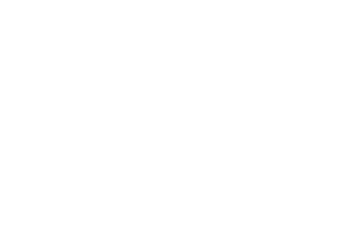

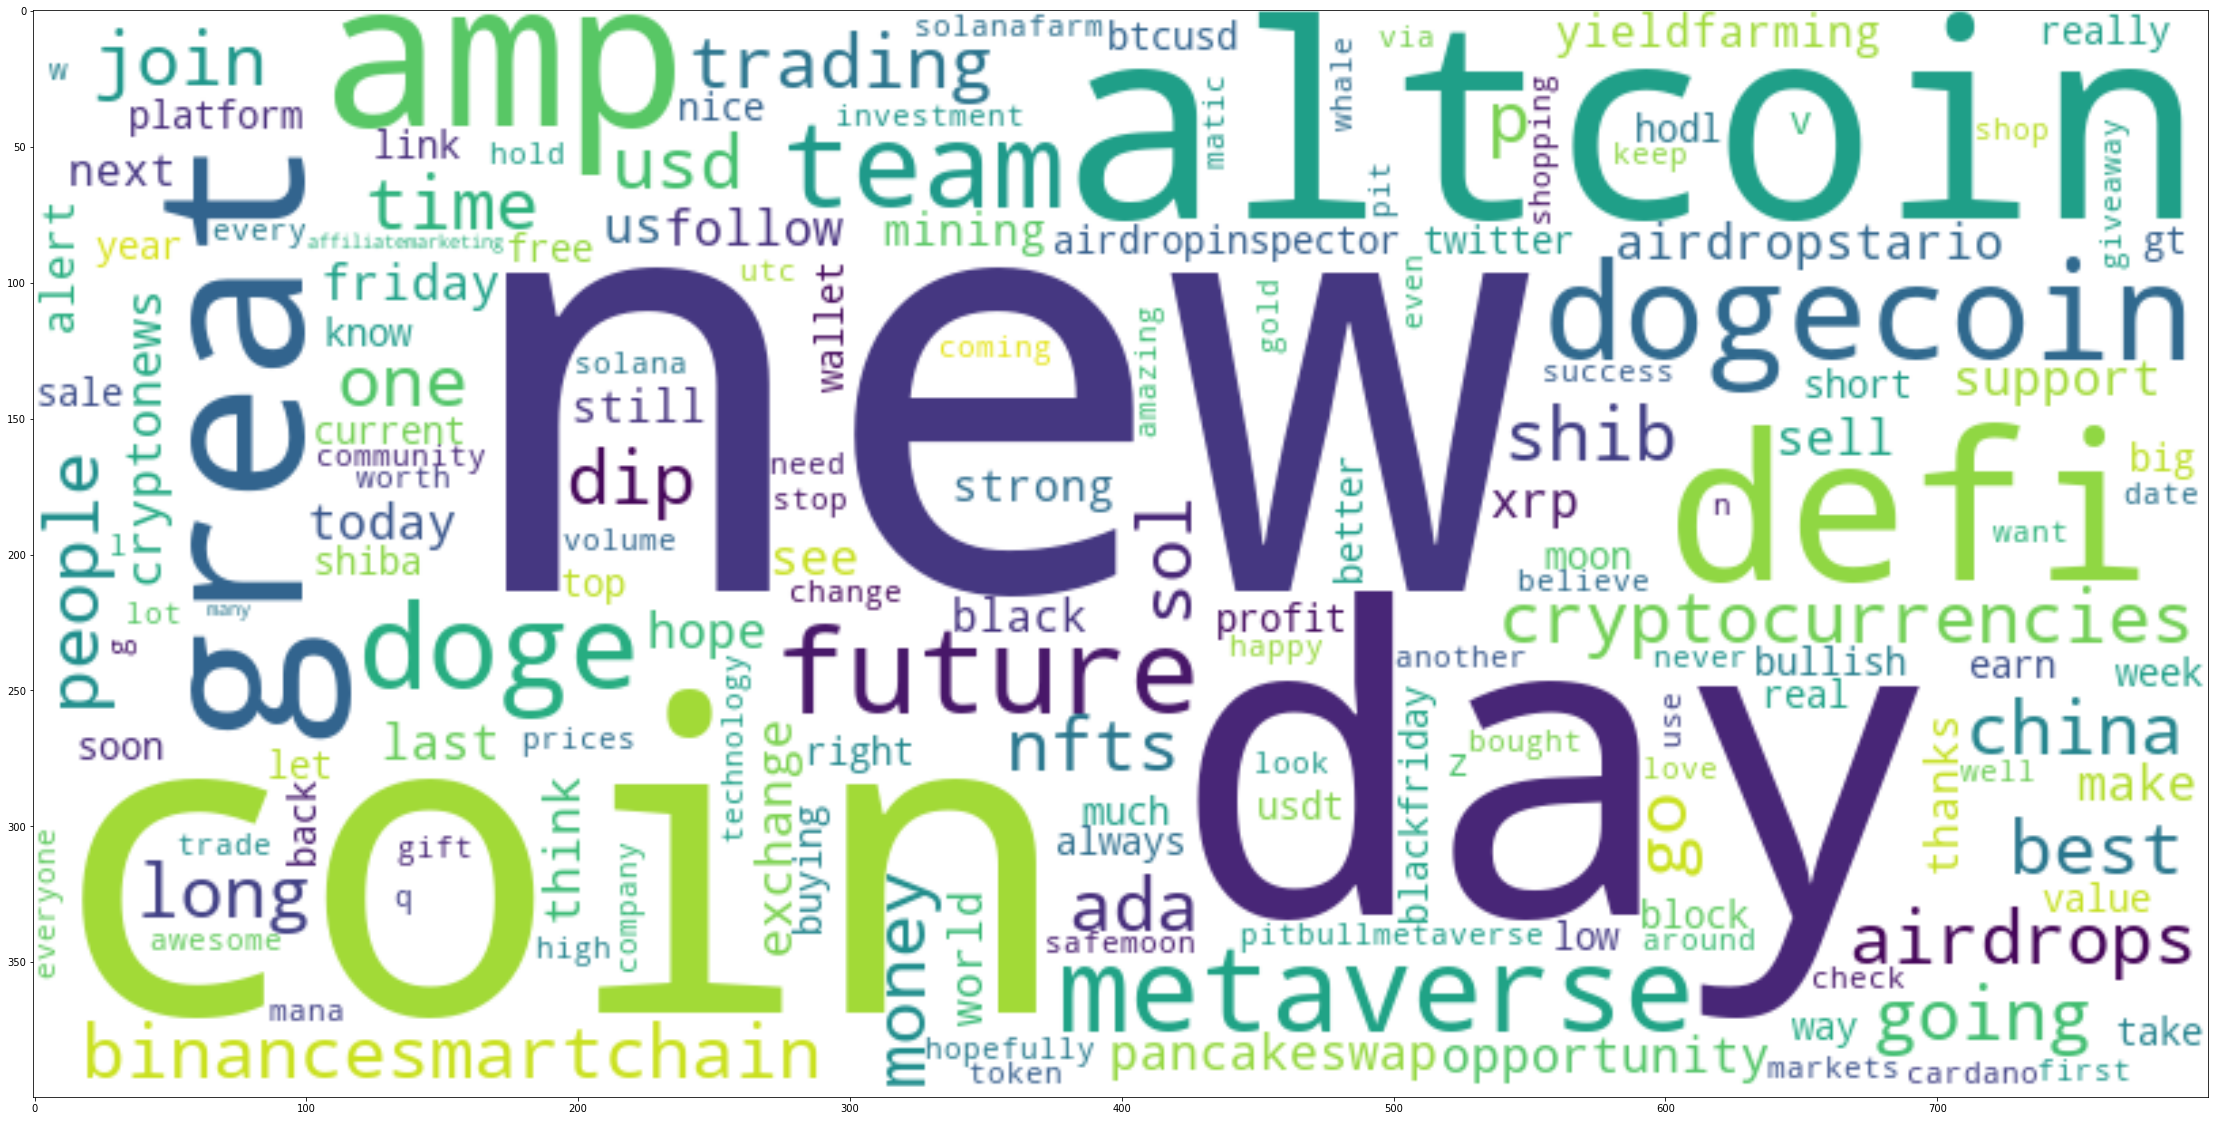

In [78]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(textc)
plt.axis("off")

plt.figure( figsize=(40,20))

plt.tight_layout(pad=0)

plt.imshow(wordcloud, interpolation='bilinear')

plt.show()